# Análise dos Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfp = pd.read_csv("../data/pessoas_completo_limpo.csv")
dfs = pd.read_csv("../data/sinistros_completo_limpo.csv")
dfv = pd.read_csv("../data/veiculos_completo_limpo.csv")

In [3]:
dfs["tipo_acidente_primario"].value_counts()

COLISAO           498994
OUTROS            448009
ATROPELAMENTO     117179
NAO DISPONIVEL     95723
CHOQUE             81038
Name: tipo_acidente_primario, dtype: int64

Como em todos os dataframes há uma quantidade muito menor de registros nos anos entre 2014-2018, e 2025 por ainda estar em andamento, terão seus valores desconsiderados para que a análise seja mais confiável no período estudado

In [4]:
#(dfp["ano_sinistro"] < 2019).sum()
dfp = dfp[(dfp["ano_sinistro"] >= 2019) & (dfp["ano_sinistro"] < 2025)]
dfs = dfs[(dfs["ano_sinistro"] >= 2019) & (dfs["ano_sinistro"] < 2025)]
dfv = dfv[(dfv["ano_sinistro"] >= 2019) & (dfv["ano_sinistro"] < 2025)]

## Quantidade de acidentes por ano

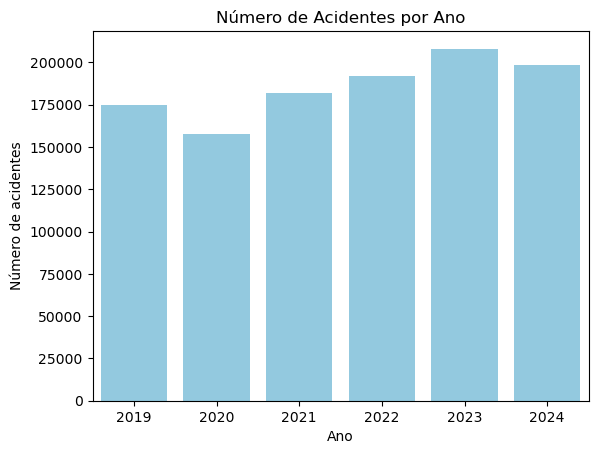

In [5]:
sns.countplot(data=dfs, x="ano_sinistro", color="skyblue")
plt.title("Número de Acidentes por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de acidentes")

plt.show()

Visível no gráfico acima que 2020 foi o ano com menos acidentes entre os mostrados, o que pode ser explicado pela covid que diminuiu drasticamente o tráfego de veículos nas ruas. Outra informação visível é o aumento crescente de acidentes nos últimos anos, que pode ser explicado por uma possível crescente de veículos transitando nas ruas.

## Quantidade de acidentes por hora

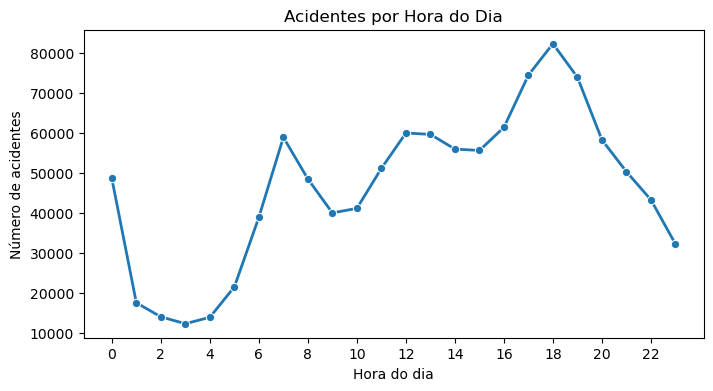

In [6]:
plt.figure(figsize=(8, 4))
accident_hour = dfs["hora_sinistro"].dropna().astype(int).value_counts().sort_index()
sns.lineplot(x=accident_hour.index, y=accident_hour.values, marker="o", linewidth=2)

plt.title("Acidentes por Hora do Dia")
plt.xlabel("Hora do dia")
plt.ylabel("Número de acidentes")
plt.xticks(range(0, 24, 2))

plt.show()

No gráfico de acidentes por hora do dia é possível verificar que os horários com maior quantidade de acidentes é entre as 16h e 20h, justamente o horário de pico de veículos nas ruas, porém também digno de nota a quantidade muito inferior de acidentes no horário de pico da manhã, das 6h às 8h. Mostrando que uma possível causa dos acidentes possa ser o cansaço físico/mental do condutor ao volante.

## Quantidade de envolvidos em acidentes por faixa etária

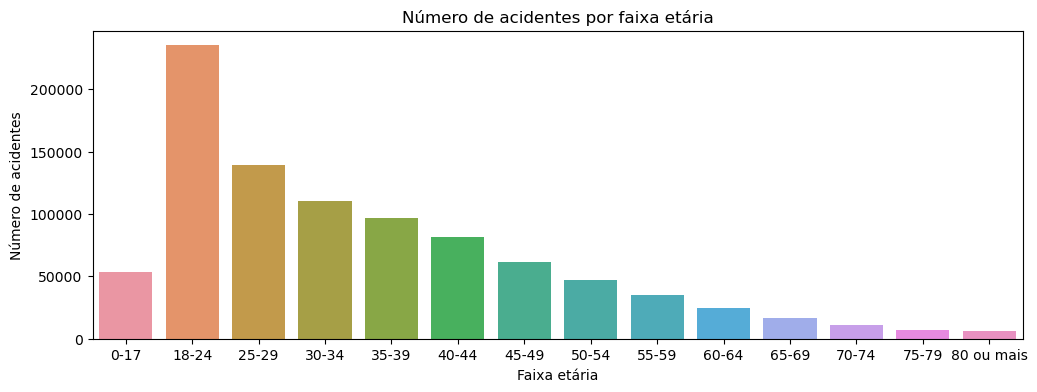

In [7]:
etary_order = [
    "0-17","18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54",
    "55-59", "60-64", "65-69", "70-74", "75-79", "80 ou mais"
]
plt.figure(figsize=(12, 4))
sns.countplot(data=dfp, x="faixa_etaria_legal", order=etary_order)

plt.title("Número de acidentes por faixa etária")
plt.xlabel("Faixa etária")
plt.ylabel("Número de acidentes")

plt.show()

Nesse gráfico é mostrado como há um decréscimo de acidentes a cada faixa etária mostrando que a maioria dos acidentes decorrem de motoristas mais jovens, seja pela maior quantidade de motoristas dessas faixas etárias em relação às outras nas ruas ou pela menor expêriencia em frente ao volante.

## Proporção de acidentes por tipo de via

In [8]:
df_ps = pd.merge(dfp, dfs, on="id_sinistro", how="inner")
df_ps = df_ps[df_ps["tipo_via_x"] != "NAO DISPONIVEL"]

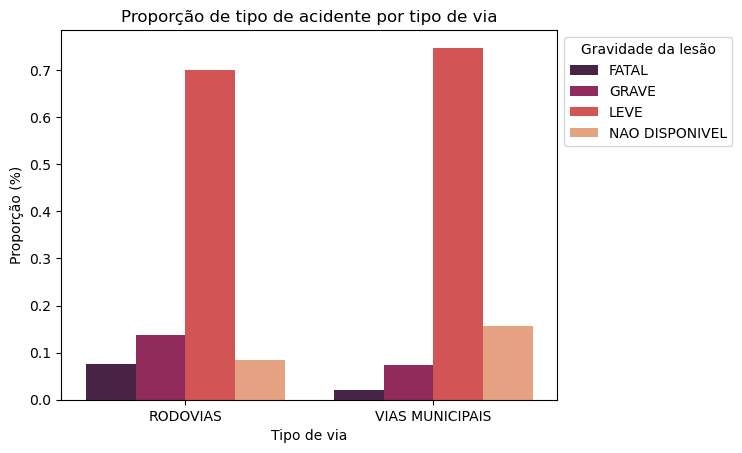

In [9]:
ps_proportional = df_ps.groupby(["tipo_via_x", "gravidade_lesao"]).size().reset_index(name="contagem")
ps_proportional["proporcao"] = ps_proportional.groupby("tipo_via_x")["contagem"].transform(lambda x: x/x.sum())

sns.barplot(data=ps_proportional, x="tipo_via_x", y="proporcao", hue="gravidade_lesao", palette="rocket")

plt.title("Proporção de tipo de acidente por tipo de via")
plt.xlabel("Tipo de via")
plt.ylabel("Proporção (%)")
plt.legend(title="Gravidade da lesão", bbox_to_anchor=(1, 1))

plt.show()

Por esse gráfico podemos observar que há uma proporção maior de acidentes graves e fatais em rodovias do que em vias municipais, podendo ser atribuída pela alta velocidade dos carros em rodovias.

## Mapa de calor de acidentes por mês por ano

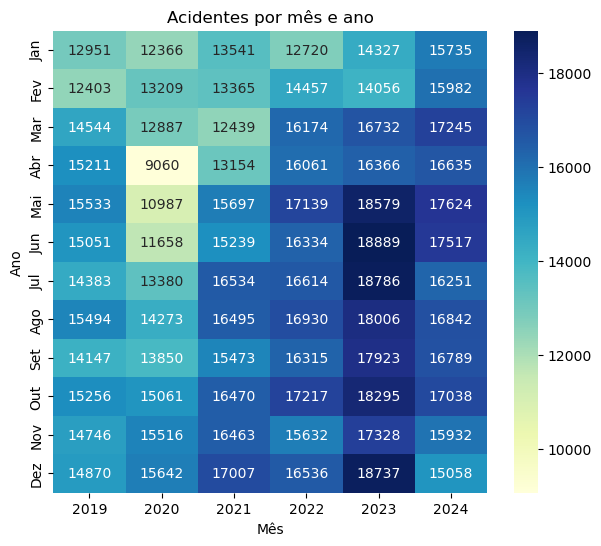

In [10]:
month_order = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
dfs["mes_sinistro"] = pd.Categorical(dfs["mes_sinistro"], categories=month_order, ordered=True)

accidents_y_m = dfs.groupby(["ano_sinistro", "mes_sinistro"]).size().reset_index(name="acidentes")
accidents_y_m_pivot = accidents_y_m.pivot(index="mes_sinistro", columns="ano_sinistro", values="acidentes")

plt.figure(figsize=(7, 6))
sns.heatmap(accidents_y_m_pivot, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Acidentes por mês e ano")
plt.xlabel("Mês")
plt.ylabel("Ano")

plt.show()

No heatmap é visível como o período entre março e outubro são os meses onde mais ocorrem acidentes no ano, com a exceção de 2020, onde podemos observar um comportamento contrária do que ocorre nos outros anos explicado pelo fato da quarentena da covid ter sido iniciada em março, causando uma grande diminuição de acidentes nos meses subsequentes. Outro ponto interessante para destacar é como dezembro é um mês com muitos acidentes, que pode ser casuado pelo maior tráfego de veículos noas festas de fim de ano.

## Idade por tipo de veículo

In [11]:
df_pv = pd.merge(dfp, dfv, on="id_sinistro", how="inner")
df_pv = df_pv[(df_pv["tipo_veiculo"] != "NAO DISPONIVEL") & (df_pv["idade"] >= 0) & (df_pv["idade"] <= 100)]

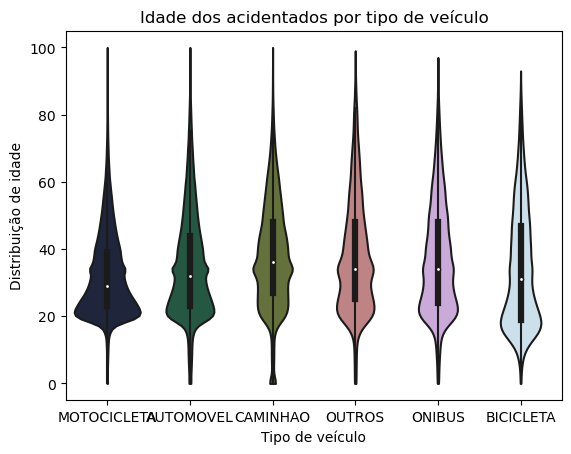

In [12]:
sns.violinplot(data=df_pv, x="tipo_veiculo", y="idade", cut=0, palette="cubehelix")

plt.title("Idade dos acidentados por tipo de veículo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Distribuição de idade")

plt.show()

No gráfico de violino é mostrado como a distribuição de idade é diferente para cada tipo de veículo, onde nas motocicletas e nas bicicletas, principalmente, a idade dos acidentados tende a ser menor, enquanto a de acidentados em caminhões tende a ser ligeiramente maior que as em automóvel e em ônibus.

## Gravidade das lesões por tipo de veículo

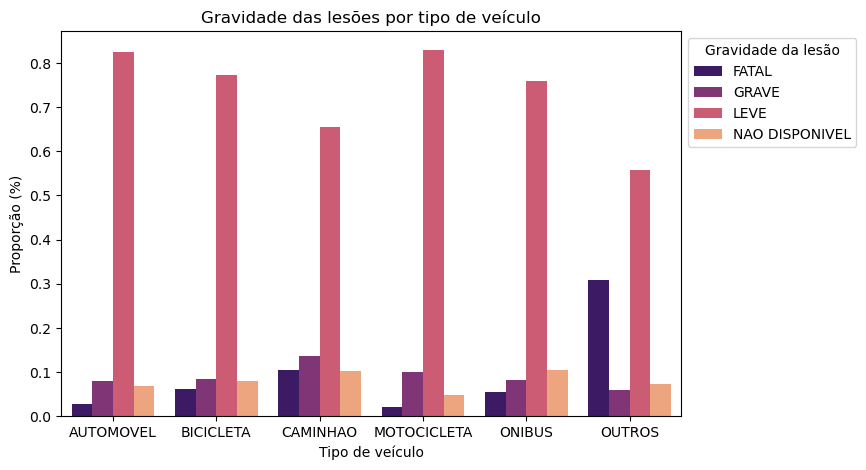

In [13]:
pv_proportional = df_pv.groupby(["tipo_veiculo", "gravidade_lesao"]).size().reset_index(name="contagem")
pv_proportional["proporcao"] = pv_proportional.groupby("tipo_veiculo")["contagem"].transform(lambda x: x/x.sum())

plt.figure(figsize=(8,5))
sns.barplot(data=pv_proportional, x="tipo_veiculo", y="proporcao", hue="gravidade_lesao", palette="magma")

plt.title("Gravidade das lesões por tipo de veículo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Proporção (%)")
plt.legend(title="Gravidade da lesão", bbox_to_anchor=(1, 1))

plt.show()

No gráfico sobre a gravidade das lesões por tipo de veículo é possível observar que acidentes de caminhão são mais perigosos do que em outros veículos. A coluna "Outros" tem muito mais acidentes graves do que nas outras, em que ela pode estar contemplando veículos agrícolas ou de construção.

## GeoMap do estado de São Paulo

In [14]:
from unidecode import unidecode
import geopandas as gpd
import numpy as np
geo_df = gpd.read_file("../data//SP_MAP/SP_Municipios_2024.shp")

In [15]:
dfs_count = dfs.groupby("municipio").size().reset_index(name="contagem")

# fazendo replace de apóstrofe no geo_df pois na tabela dfs os valores não estão com a acentuação
geo_df["NM_MUN"] = geo_df["NM_MUN"].str.upper().str.strip().apply(unidecode).replace(r"D[''']", "D ", regex=True)
dfs_count["municipio"] = dfs_count["municipio"].str.upper().str.strip()

geo_df = geo_df.merge(dfs_count, how="inner", left_on="NM_MUN", right_on="municipio")

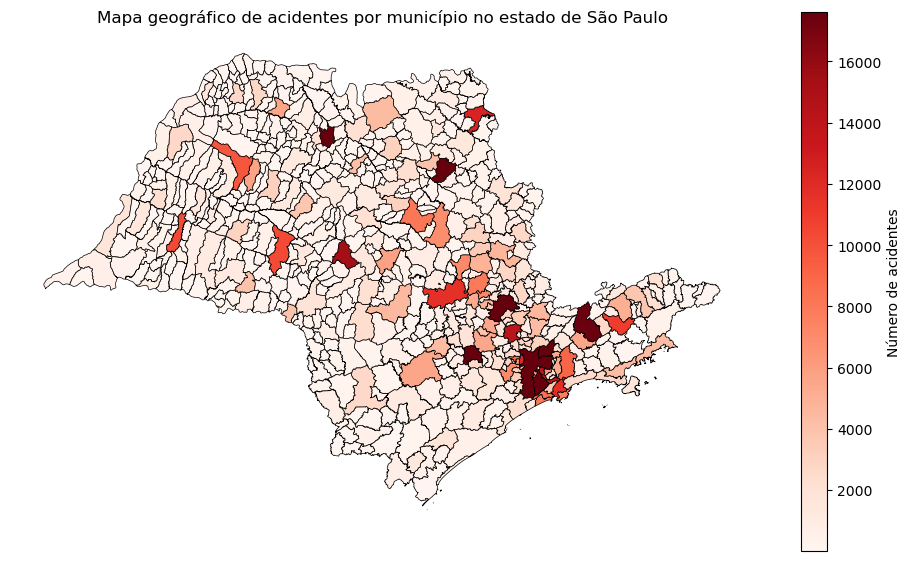

In [16]:
vmin, vmax = geo_df["contagem"].min(), geo_df["contagem"].quantile(.99)
colors = plt.cm.Reds((geo_df["contagem"] - vmin)/(vmax - vmin))

fig, ax = plt.subplots(figsize=(12, 7))
geo_df.plot(ax=ax, color=colors, linewidth=0.5, edgecolor="black", legend=True)

plt.title("Mapa geográfico de acidentes por município no estado de São Paulo")
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Número de acidentes")

ax.axis("off")

plt.show()

O mapa acima mostra a distribuição de acidentes por município no estado de São Paulo, e é evidente como nas grandes cidades e centros urbanos a quantidade de acidentes é maior, causado pelo maior número de veículos circulando nas ruas. Destaque para a cidade de São Paulo que é a mais populosa cidade e também capital do estado.